In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import matplotlib.pyplot as plt
def plot_image(image,color,title):
  plt.grid("false")
  plt.title(title)
  if(color=='colored'):
    plt.imshow(image)
  elif(color=="gray"):
    plt.imshow(image,cmap='gray')

In [0]:
import cv2 as cv
def BGR2RGB(image):
  return cv.cvtColor(image,cv.COLOR_BGR2RGB)

In [0]:
def plot2Images(im1,im1_title,im2,im2_title):
  fig = plt.figure()
  ax1=fig.add_subplot(1,2,1)
  ax1.set_title(im1_title)
  ax1.grid(False)
  ax1.imshow(im1,cmap='gray')
  ax2=fig.add_subplot(1,2,2)
  ax2.set_title(im2_title)
  ax2.grid(False)
  ax2.imshow(im2,cmap='gray')
  plt.show()

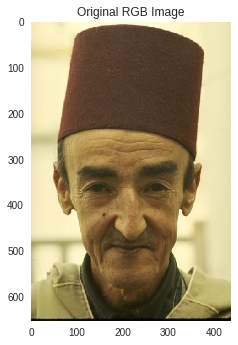

In [0]:
image = cv.imread('image.jpeg')
RGB_image=BGR2RGB(image)
plot_image(RGB_image,"colored","Original RGB Image")

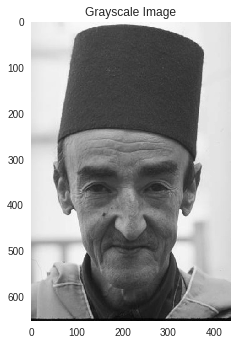

In [0]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plot_image(gray_image,"gray","Grayscale Image")

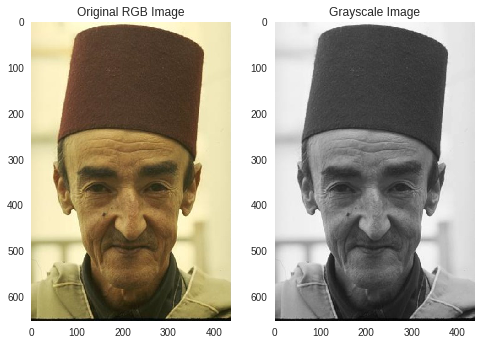

In [0]:
#plot original and grey side by side
plot2Images(RGB_image,"Original RGB Image",gray_image,"Grayscale Image")

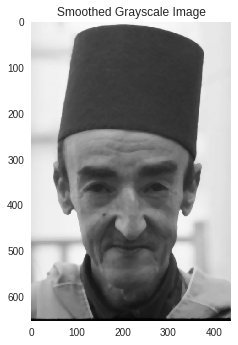

In [0]:
median_image=cv.medianBlur(gray_image,7)
plot_image(median_image,"gray","Smoothed Grayscale Image")

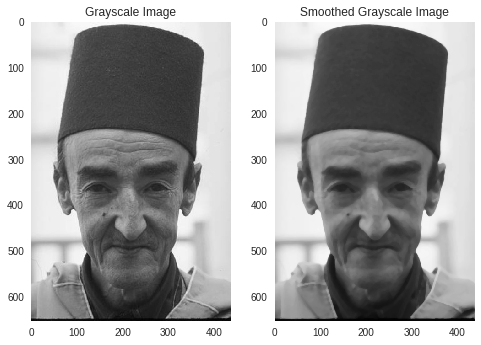

In [0]:
#plot gray and median side by side
plot2Images(gray_image,"Grayscale Image",median_image,"Smoothed Grayscale Image")

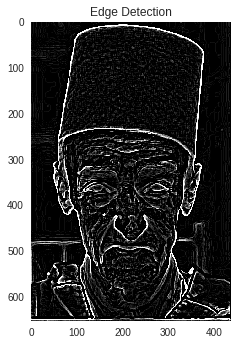

In [0]:
laplacian_image = cv.Laplacian(median_image, ddepth=-1,ksize=5)
plot_image(laplacian_image,"gray","Edge Detection")

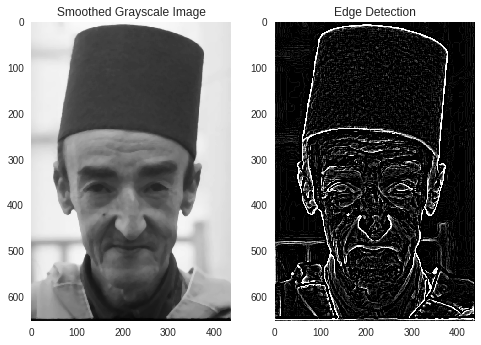

In [0]:
#plot median and laplacian side by side
plot2Images(median_image,"Smoothed Grayscale Image",laplacian_image,"Edge Detection")

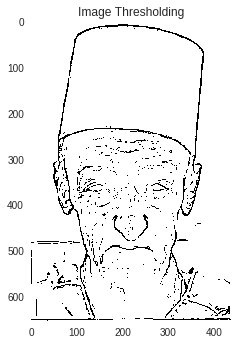

In [0]:
ret,thresh = cv.threshold(laplacian_image,125,255,cv.THRESH_BINARY_INV)
plot_image(thresh,"gray","Image Thresholding")

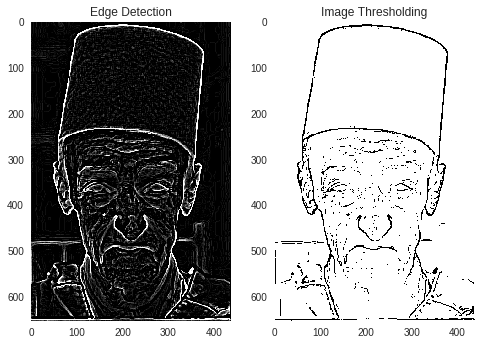

In [0]:
#plot laplacian and thresholding side by side
plot2Images(laplacian_image,"Edge Detection",thresh,"Image Thresholding")

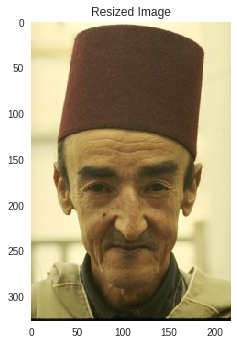

In [0]:
resized_image=cv.resize(image,(0,0),fx=0.5,fy=0.5)
plot_image(BGR2RGB(resized_image),"colored","Resized Image")

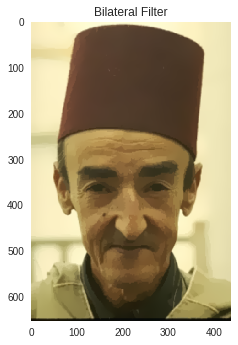

In [0]:
iterations=7
for i in range(iterations):
  resized_image= cv.bilateralFilter(resized_image,d=9,sigmaColor=9,sigmaSpace=7)
#bilateral_image=cv.pyrUp(resized_image) 
bilateral_image=cv.resize(resized_image,(image.shape[1],image.shape[0]))
plot_image(BGR2RGB(bilateral_image),"colored","Bilateral Filter")

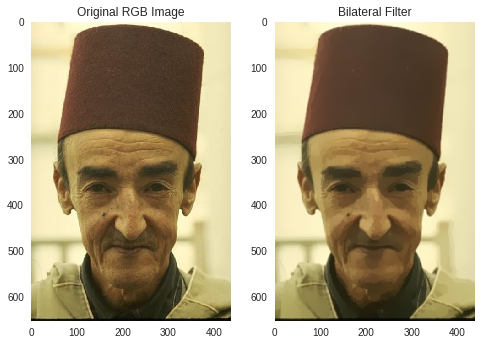

In [0]:
#plot original and bilateral side by side
plot2Images(RGB_image,"Original RGB Image",BGR2RGB(bilateral_image),"Bilateral Filter")

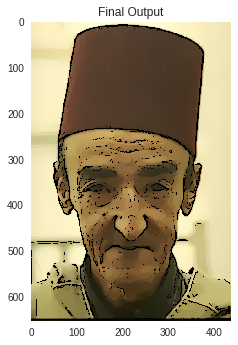

In [0]:
temp=cv.cvtColor(thresh,cv.COLOR_GRAY2BGR)
cartoon=cv.bitwise_and(bilateral_image,temp)
plot_image(BGR2RGB(cartoon),"colored","Final Output")

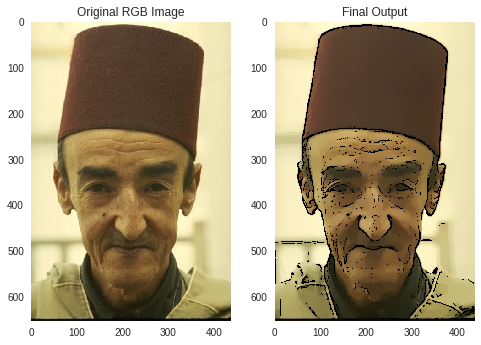

In [0]:
#plot original and final output side by side
plot2Images(RGB_image,"Original RGB Image",BGR2RGB(cartoon),"Final Output")